<a href="https://colab.research.google.com/github/angelamejia804/TimeSeries/blob/main/Preparacion_TimeSeries_Recepcion_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import warnings
import itertools
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from matplotlib.colors import Normalize
from time import time
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()


mpl.rcParams['figure.figsize'] = (11, 4)
mpl.rcParams['axes.grid'] = False

import statsmodels.api as sm

plt.style.use('fivethirtyeight')

BASE DE DATOS DE RECEPCIÓN

In [2]:
from google.colab import files
uploaded = files.upload()

Saving reception_MB.csv to reception_MB.csv


In [ ]:
#df_r = pd.read_csv("reception_MB_XDia.csv", delimiter=',')

In [3]:
df_r = pd.read_csv("reception_MB.csv", delimiter=',')

In [4]:
df_r

,YYYYWWMarketing,Sede,FlowerType,FlowerColor,FlowerVariety,Reception Flower Stems
0,202001,MB,Rose - Red,Red,Freedom,91939
1,202002,MB,Rose - Red,Red,Freedom,200892
2,202003,MB,Rose - Red,Red,Freedom,676003
3,202004,MB,Rose - Red,Red,Freedom,1288302
4,202005,MB,Rose - Red,Red,Freedom,507192
...,...,...,...,...,...,...
168,202312,MB,Rose - Red,Red,Freedom,193955
169,202313,MB,Rose - Red,Red,Freedom,291043
170,202314,MB,Rose - Red,Red,Freedom,292633
171,202315,MB,Rose - Red,Red,Freedom,320622


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_r, *['YYYYWWMarketing'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_r, *['Reception Flower Stems'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_r, *['YYYYWWMarketing'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_r, *['Reception Flower Stems'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_r, *[[['YYYYWWMarketing', 'Reception Flower Stems']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_r, *['YYYYWWMarketing', 'Reception Flower Stems', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_r, *['YYYYWWMarketing', 'count()', None], **{})
chart

In [5]:
df_r['YYYYWWMarketing'] = df_r['YYYYWWMarketing'].apply(str)  #fecha = pd.to_datetime(semana_str + '1', format='%Y%U%w')
#df['fecha'] = df['semana'].apply(lambda x: pd.to_datetime(x + '1', format='%Y%U%w'))

In [ ]:
#df_r['YYYYWWMarketing'] = df_r['YYYYWWMarketing'].apply(lambda x: pd.to_datetime(x + '1', format='%Y%U%w'))

In [6]:
#se le da a las semanas formato fecha año W- semana
df_r['fecYYYYWWMarketingha'] = pd.to_datetime(df_r['YYYYWWMarketing'] + '1', format='%Y%U%w').dt.strftime('%Y-W%U')

In [8]:
df_r

,YYYYWWMarketing,Sede,FlowerType,FlowerColor,FlowerVariety,Reception Flower Stems,fecYYYYWWMarketingha
0,202001,MB,Rose - Red,Red,Freedom,91939,2020-W01
1,202002,MB,Rose - Red,Red,Freedom,200892,2020-W02
2,202003,MB,Rose - Red,Red,Freedom,676003,2020-W03
3,202004,MB,Rose - Red,Red,Freedom,1288302,2020-W04
4,202005,MB,Rose - Red,Red,Freedom,507192,2020-W05
...,...,...,...,...,...,...,...
168,202312,MB,Rose - Red,Red,Freedom,193955,2023-W12
169,202313,MB,Rose - Red,Red,Freedom,291043,2023-W13
170,202314,MB,Rose - Red,Red,Freedom,292633,2023-W14
171,202315,MB,Rose - Red,Red,Freedom,320622,2023-W15


In [9]:
df_r.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
YYYYWWMarketing,173,173,202001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sede,173,1,MB,173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FlowerType,173,1,Rose - Red,173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FlowerColor,173,1,Red,173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FlowerVariety,173,1,Freedom,173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reception Flower Stems,173.0,NaN,NaN,NaN,288690.086705,181490.91308,72136.0,188081.0,239857.0,308311.0,1288302.0
fecYYYYWWMarketingha,173,172,2021-W01,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_r.head()

,YYYYWWMarketing,Sede,FlowerType,FlowerColor,FlowerVariety,Reception Flower Stems,fecYYYYWWMarketingha
0,202001,MB,Rose - Red,Red,Freedom,91939,2020-W01
1,202002,MB,Rose - Red,Red,Freedom,200892,2020-W02
2,202003,MB,Rose - Red,Red,Freedom,676003,2020-W03
3,202004,MB,Rose - Red,Red,Freedom,1288302,2020-W04
4,202005,MB,Rose - Red,Red,Freedom,507192,2020-W05


Se construye un nuevo DF con las columnas de interes

In [11]:
df_r=df_r[['fecYYYYWWMarketingha','Reception Flower Stems','YYYYWWMarketing']]

In [12]:
df_r

,fecYYYYWWMarketingha,Reception Flower Stems,YYYYWWMarketing
0,2020-W01,91939,202001
1,2020-W02,200892,202002
2,2020-W03,676003,202003
3,2020-W04,1288302,202004
4,2020-W05,507192,202005
...,...,...,...
168,2023-W12,193955,202312
169,2023-W13,291043,202313
170,2023-W14,292633,202314
171,2023-W15,320622,202315


In [13]:
#renombramos las columnas
df_r = df_r.rename(columns={'fecYYYYWWMarketingha':'Semana','Reception Flower Stems':'Tallos'})

In [ ]:
df_r.describe(include='all')

,Semana,Tallos,YYYYWWMarketing
count,173,1.730000e+02,173
unique,172,NaN,173
top,2021-W01,NaN,202001
freq,2,NaN,1
mean,NaN,2.886901e+05,NaN
std,NaN,1.814909e+05,NaN
min,NaN,7.213600e+04,NaN
25%,NaN,1.880810e+05,NaN
50%,NaN,2.398570e+05,NaN
75%,NaN,3.083110e+05,NaN


In [14]:
df_r

,Semana,Tallos,YYYYWWMarketing
0,2020-W01,91939,202001
1,2020-W02,200892,202002
2,2020-W03,676003,202003
3,2020-W04,1288302,202004
4,2020-W05,507192,202005
...,...,...,...
168,2023-W12,193955,202312
169,2023-W13,291043,202313
170,2023-W14,292633,202314
171,2023-W15,320622,202315


Creamos un indice por semana que va ser usada como columna de agrupación y analisis, ademas se unira a los demas DF por este mismo atributo

In [15]:
df_recepcion = df_r.set_index('Semana')

In [16]:
df_recepcion

,Tallos,YYYYWWMarketing
Semana,,
2020-W01,91939,202001
2020-W02,200892,202002
2020-W03,676003,202003
2020-W04,1288302,202004
2020-W05,507192,202005
...,...,...
2023-W12,193955,202312
2023-W13,291043,202313
2023-W14,292633,202314


In [22]:
df_recepcion=df_recepcion.groupby('Semana').sum() # promedio semanal

In [28]:
df_recepcion.tail()

,Tallos
Semana,
2023-W12,193955
2023-W13,291043
2023-W14,292633
2023-W15,320622
2023-W16,810080


In [29]:
df_recepcion.head()

,Tallos
Semana,
2020-W01,91939
2020-W02,200892
2020-W03,676003
2020-W04,1288302
2020-W05,507192


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Tallos'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['Tallos'], **{})
chart

In [25]:
#df_recepcion_test.head()

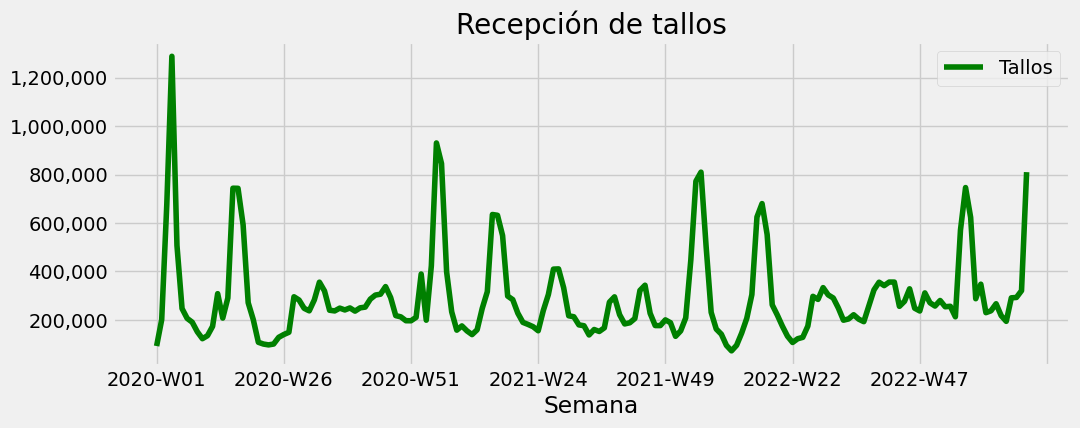

In [27]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick  # Importar el módulo de formateo de ejes

#  DataFrame df_recepcion con datos

# Crear el gráfico de líneas
ax = df_recepcion.plot(kind='line', y='Tallos', color='green')

# Configurar el título
plt.title("Recepción de tallos")

# Cambiar el formato de los ejes y establecer comas en lugar de puntos decimales
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Mostrar el gráfico
plt.show()

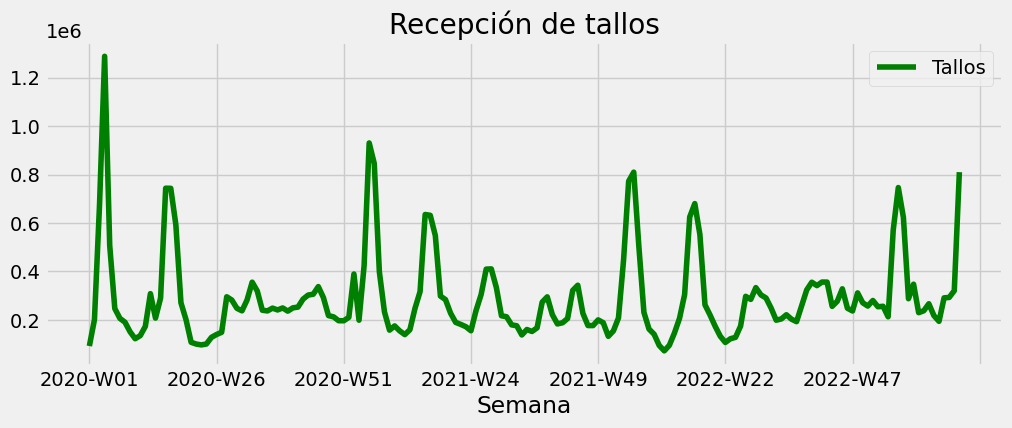

In [26]:
df_recepcion.plot(kind='line',y='Tallos',color='green')
plt.title("Recepción de tallos")
plt.show()


In [ ]:
df_recepcion.tail()

,Tallos
Semana,
2023-W12,193955
2023-W13,291043
2023-W14,292633
2023-W15,320622
2023-W16,810080


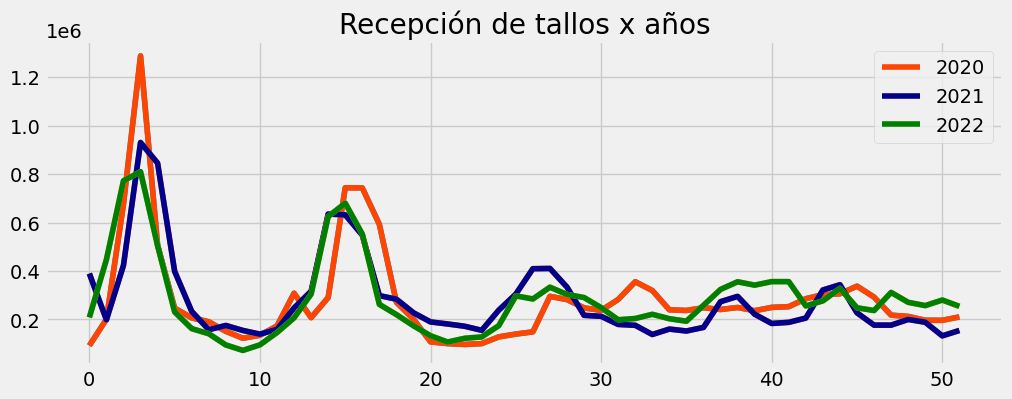

In [41]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick  # Importar el módulo de formateo de ejes
df_rec_2020 = df_recepcion.loc['2020-W01':'2020-W53']
plt.plot(df_rec_2020.values)
plt.plot(df_rec_2020.values, color='orangered', label='2020')


df_rec_2021 = df_recepcion.loc['2021-W01':'2021-W53']
plt.plot(df_rec_2021.values)
plt.plot(df_rec_2021.values, color='darkblue',label='2021' )


df_rec_2022 = df_recepcion.loc['2022-W01':'2022-W53']
plt.plot(df_rec_2022.values)
plt.plot(df_rec_2022.values, color='green' ,label='2022')

#df_rec_2023 = df_recepcion.loc['2023-W01':'2023-W53']
#plt.plot(df_rec_2023.values)
#plt.plot(df_rec_2023.values, color='salmon',label='2023')


plt.title("Recepción de tallos x años")
plt.legend()

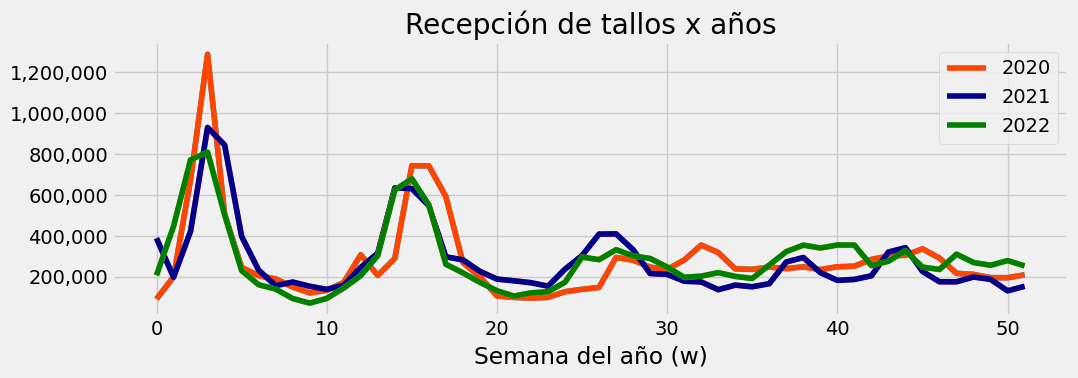

In [46]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick  # Importar el módulo de formateo de ejes


# Crear el gráfico de líneas para 2020

df_rec_2020 = df_recepcion.loc['2020-W01':'2020-W53']
plt.plot(df_rec_2020.values)
plt.plot(df_rec_2020.values, color='orangered', label='2020')

# Crear el gráfico de líneas para 2021

df_rec_2021 = df_recepcion.loc['2021-W01':'2021-W53']
plt.plot(df_rec_2021.values)
plt.plot(df_rec_2021.values, color='darkblue',label='2021' )

# Crear el gráfico de líneas para 2022

df_rec_2022 = df_recepcion.loc['2022-W01':'2022-W53']
plt.plot(df_rec_2022.values)
plt.plot(df_rec_2022.values, color='green' ,label='2022')



# Configurar el título y la leyenda
plt.title("Recepción de tallos x años")
plt.legend()

# Cambiar el formato del eje y y establecer comas en lugar de puntos decimales
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Configurar la etiqueta del eje y
plt.xlabel("Semana del año (w)")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
df_recepcion

,Tallos
Semana,
2020-W01,91939
2020-W02,200892
2020-W03,676003
2020-W04,1288302
2020-W05,507192
...,...
2023-W12,193955
2023-W13,291043
2023-W14,292633


EStadistica de balanceo, permite trazar la media movil y la desviacion estandar movil, si la serire de tempo es estacionaria

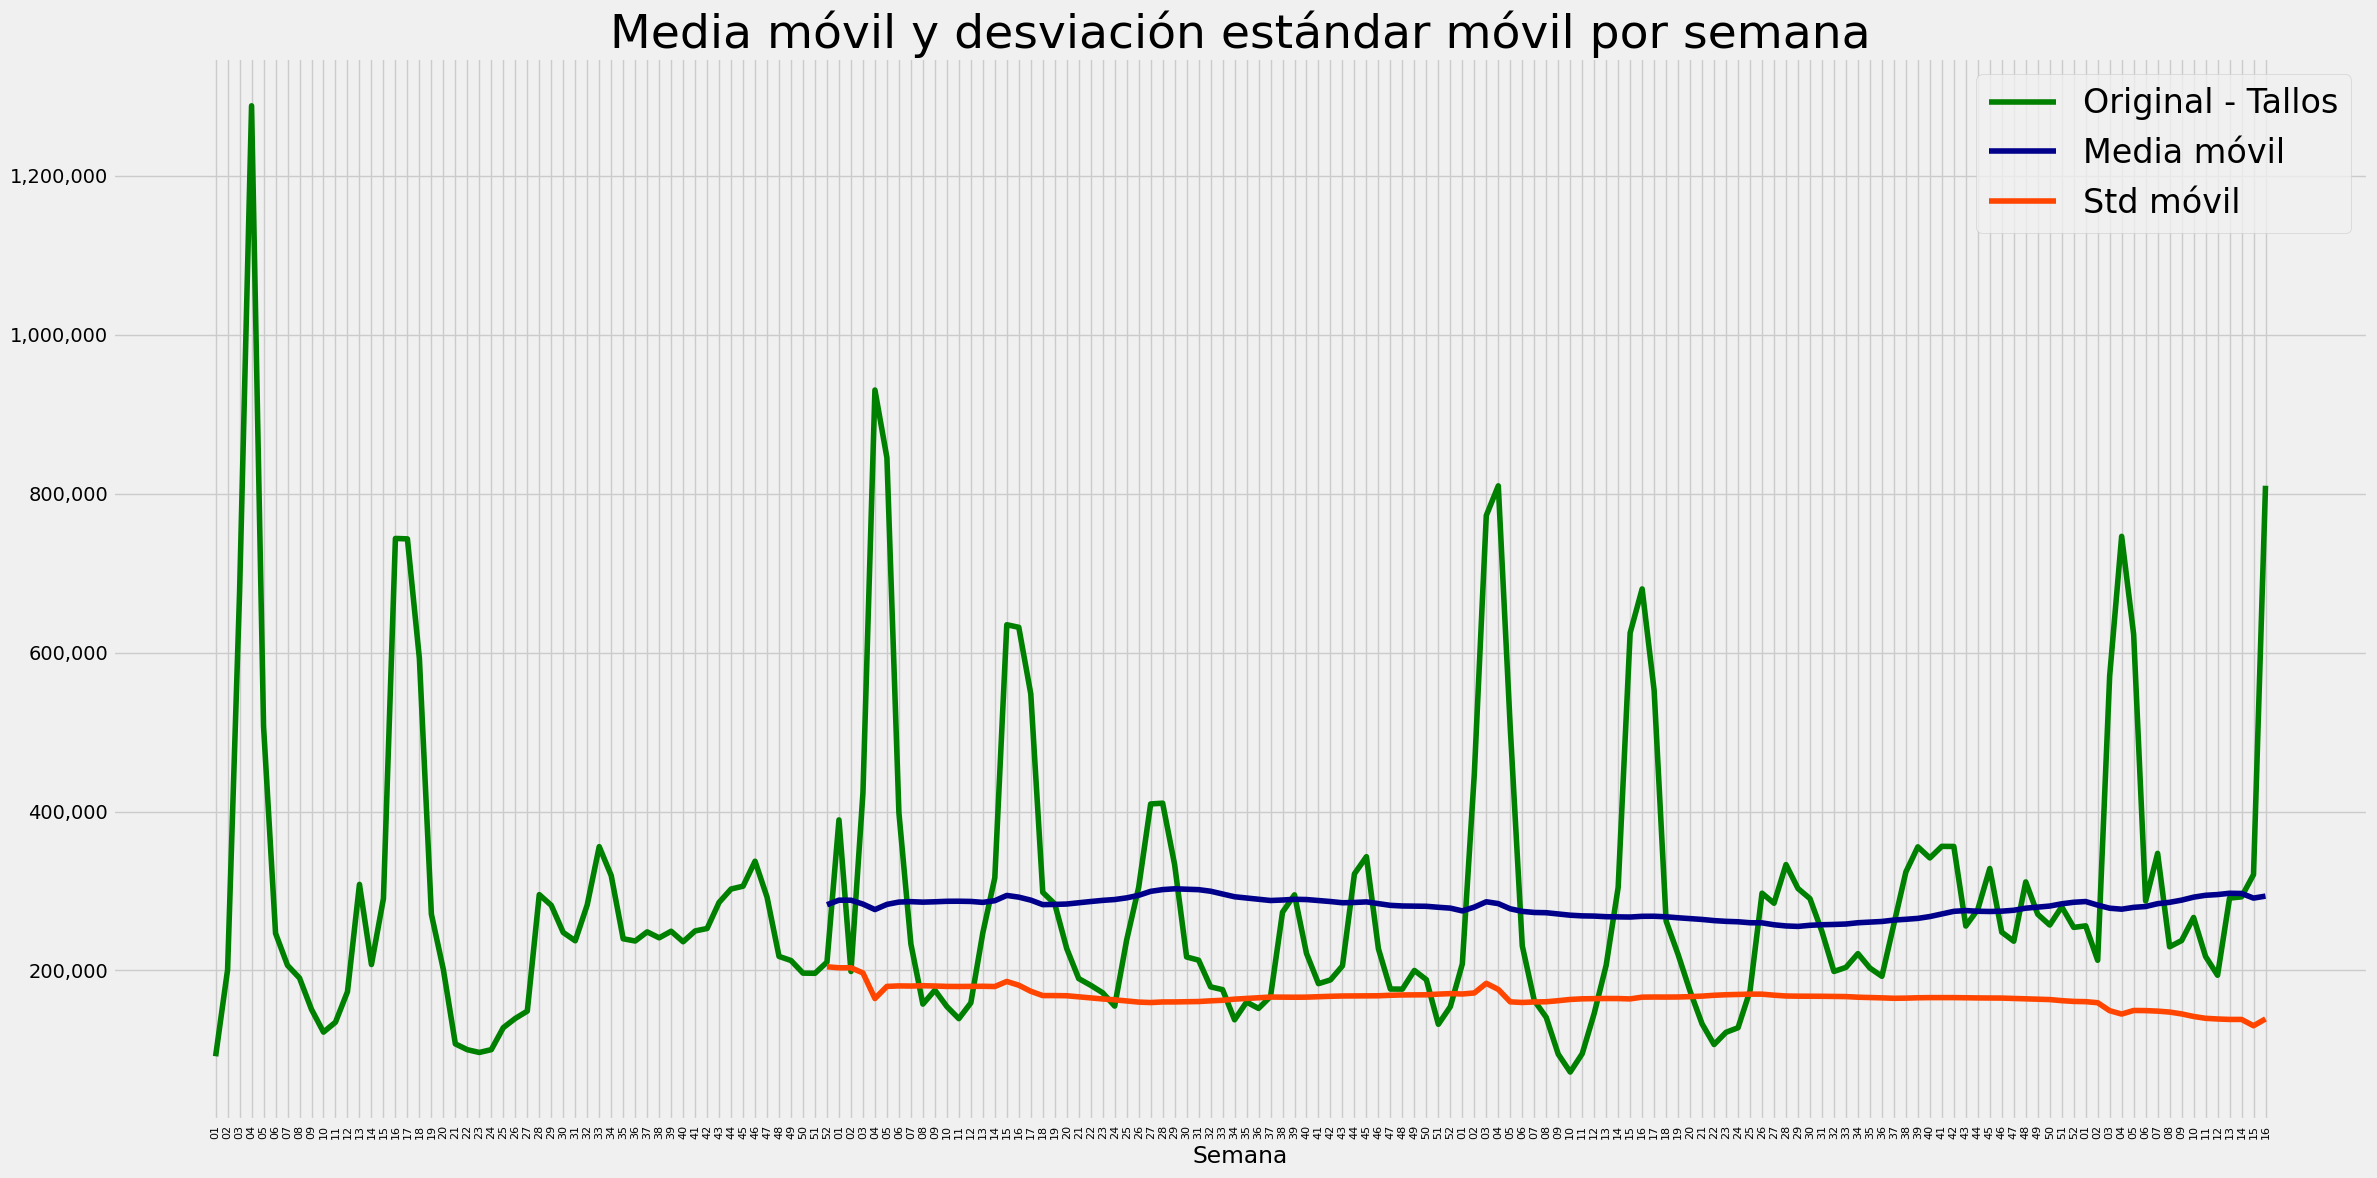

In [97]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


# Configurar el formato de las etiquetas del eje X para mostrar solo la semana
week_labels = [idx[-2:] for idx in df_recepcion.index]

# Configurar el tamaño de la figura para evitar la superposición de etiquetas
plt.figure(figsize=(24, 12))

# Configurar el formato de las etiquetas del eje X y configurar la rotación
plt.xticks(range(len(df_recepcion)), week_labels, rotation=90,fontsize=8)

# Crear el gráfico de la serie original
plt.plot(df_recepcion.index, df_recepcion['Tallos'], color='green', label='Original - Tallos')

# Crear el gráfico de la media móvil
plt.plot(df_recepcion.index, rolling_mean, color='darkblue', label='Media móvil')

# Crear el gráfico de la desviación estándar móvil
plt.plot(df_recepcion.index, rolling_std, color='orangered', label='Std móvil')

# Cambiar el formato del eje y y establecer comas en lugar de puntos decimales
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Configurar la leyenda y el título
plt.legend(loc='best', fontsize=24)
plt.xlabel("Semana")
plt.title('Media móvil y desviación estándar móvil por semana', fontsize=34)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

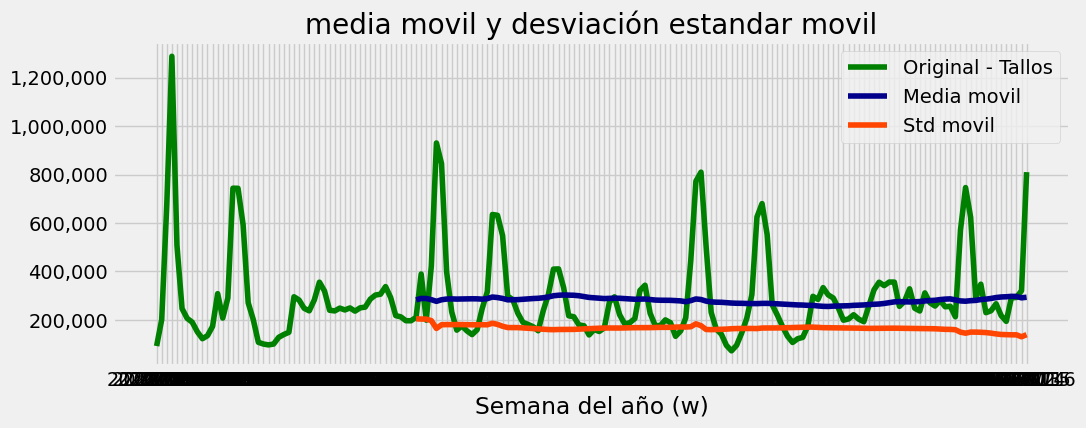

In [62]:
#https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7
rolling_mean = df_recepcion.rolling(window = 52).mean()
rolling_std = df_recepcion.rolling(window = 52).std()
plt.plot(df_recepcion, color = 'green', label = 'Original - Tallos')
plt.plot(rolling_mean, color = 'darkblue', label = 'Media movil')
plt.plot(rolling_std, color = 'orangered', label = 'Std movil')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.legend(loc = 'best')
plt.xlabel("Semana del año (w)")
plt.title('media movil y desviación estandar movil')
plt.show()

In [53]:
result = adfuller(df_recepcion['Tallos'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))


ADF Statistic: -2.6600337780044208
p-value: 0.08121315073191326
Critical Values:
	1%: -3.472161410886292
	5%: -2.8798954259680936
	10%: -2.5765565828092245


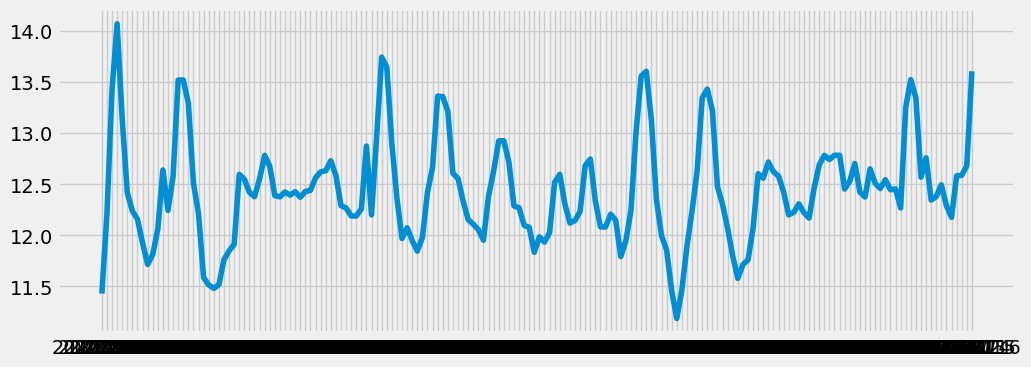

In [ ]:
#Logaritmo de los tallos permite ver lasi la media aumenta en el tiempo
df_log = np.log(df_recepcion)
plt.plot(df_log)

Descomposición de series de tiempo: Esta técnica se utiliza para descomponer una serie de tiempo en sus componentes de tendencia, estacionalidad y residuos. Si los componentes de tendencia y estacionalidad son significativos, entonces se puede concluir que la serie de tiempo tiene tanto tendencia como estacionalidad.

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import rmse

In [99]:
data = df_recepcion['Tallos']
result = seasonal_decompose(data, model='additive', period=52) #teniendo en cuenta que la ifnormacion origalmetne esta dada por semanas

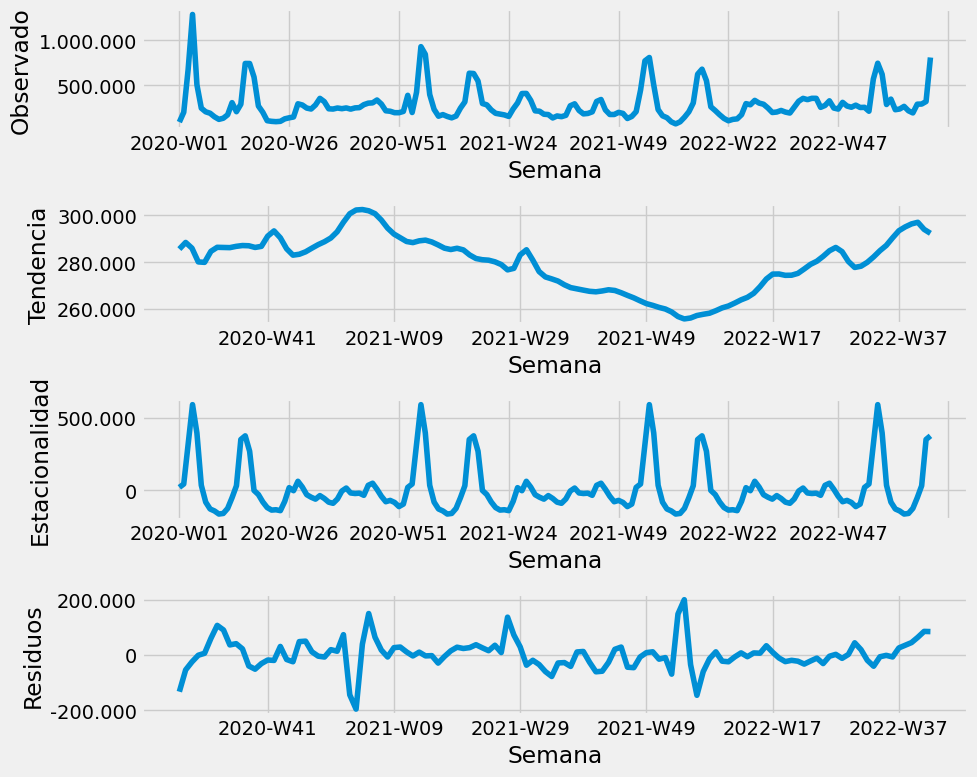

In [106]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


# Crear la figura y los subgráficos
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))

# Función para formatear los valores del eje y con punto como separador de miles
def format_with_thousands_separator(x, pos):
    return '{:,.0f}'.format(x).replace(',', '.')

# Aplicar el formato con punto como separador de miles a los ejes y en cada subgráfico
for ax in [ax1, ax2, ax3, ax4]:
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_with_thousands_separator))

# Graficar las series de tiempo en cada subgráfico
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observado')

result.trend.plot(ax=ax2)
ax2.set_ylabel('Tendencia')

result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Estacionalidad')

result.resid.plot(ax=ax4)
ax4.set_ylabel('Residuos')

# Ajustar el diseño de la figura
plt.tight_layout()

# Mostrar la figura
plt.show()

In [107]:
# Calcular las métricas de evaluación
mse = ((data - result.seasonal - result.trend - result.resid) ** 2).mean()
#rmse = rmse(data, result.seasonal + result.trend + result.resid)
r2 = 1 - (result.resid.var() / data.var())

In [108]:
print('MSE: ', mse)
#print('RMSE: ', rmse)
print('R-squared: ', r2)

MSE:  2.1519275964861297e-22
R-squared:  0.9123969445285101


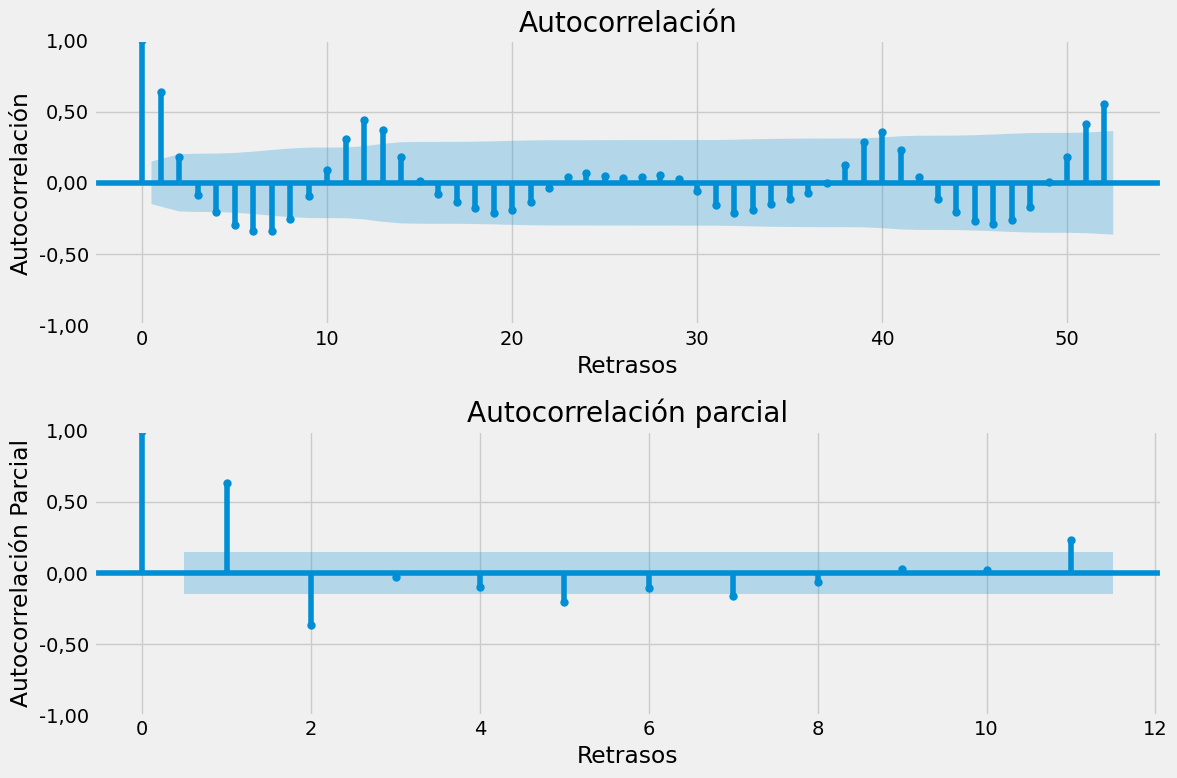

In [112]:
# Generar los gráficos de autocorrelación y autocorrelación parcial
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.ticker as mtick


# Generar los gráficos de autocorrelación y autocorrelación parcial
fig, ax = plt.subplots(nrows=2, figsize=(12, 8))
sm.graphics.tsa.plot_acf(data, lags=52, ax=ax[0])
ax[0].set_xlabel('Retrasos')
ax[0].set_ylabel('Autocorrelación')
ax[0].set_title('Autocorrelación')

# Aplicar el formato con coma como separador de miles a los valores del eje y en el primer gráfico
ax[0].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.2f}'.format(x).replace('.', ',')))

sm.graphics.tsa.plot_pacf(data, lags=11, ax=ax[1])
ax[1].set_xlabel('Retrasos')
ax[1].set_ylabel('Autocorrelación Parcial')
ax[1].set_title('Autocorrelación parcial')

# Aplicar el formato con coma como separador de miles a los valores del eje y en el segundo gráfico
ax[1].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.2f}'.format(x).replace('.', ',')))

plt.tight_layout()
plt.show()

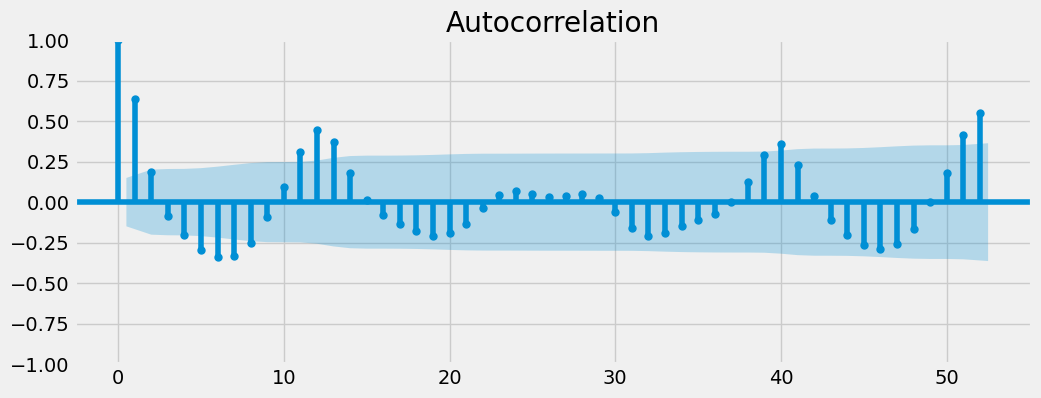

In [ ]:
# Crear gráfico de autocorrelación- ¿
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_recepcion["Tallos"], lags=52)
plt.show()

------------------- ----------------------------------- ---------------------- ------------------------- -------------

Almacenamos el DF de recepción para usar mas tarde en el modelado

In [ ]:
df_recepcion_traint=df_recepcion.loc['2020-W01':'2022-W53'] #
df_recepcion_test=df_recepcion.loc['2023-W01':] #dejamos el 2023 para probar el modelo

In [ ]:
df_recepcion_traint.to_csv('df_recepcion_traint.csv',sep= ";", header=True, index=True)
df_recepcion_test.to_csv('df_recepcion_test.csv',sep= ";", header=True, index=True)

Determinar el valor de d: El primer paso es determinar el número de diferencias necesarias para convertir la serie de tiempo en estacionaria. Esto se puede hacer mediante la inspección visual de la serie de tiempo o mediante la prueba de Dickey-Fuller. Si se necesita una diferencia, d=1; si se necesitan dos diferencias, d=2, y así sucesivamente.

Identificar el valor de q: La identificación del valor de q se puede hacer observando el primer punto en el gráfico del autocorrelaciograma que cruza la línea de confianza superior. Este punto indica el valor de q, que es el retraso máximo significativo en el cual la autocorrelación es significativamente diferente de cero. q=10

Identificar el valor de p: La identificación del valor de p se puede hacer observando el primer punto en el gráfico del autocorrelaciograma parcial que cruza la línea de confianza superior. Este punto indica el valor de p, que es el retraso máximo significativo en el cual la autocorrelación parcial es significativamente diferente de cero.

ARIMA

Se deben aplicar tecnicas de tranformacion de la serie (resta de la mdia movil)
#dejo esta parte como guia en caso de que se requiera hacer diferencición de la serie no sea estacionaria, la cantidad de diferenciaciones es lo que da origen a parametro d, para los tallos no hicimos ninguna diferenciación d=0


In [ ]:
'''df_diff = y.diff(52).dropna()'''

'df_diff = y.diff(52).dropna()'

In [ ]:
#df_diff

In [ ]:
'''df_diff.plot(kind='line',y='Tallos',color='green')
plt.title("Recepción de tallos- Serie transformada")
plt.show()'''

'df_diff.plot(kind=\'line\',y=\'Tallos\',color=\'green\')\nplt.title("Recepción de tallos- Serie transformada")\nplt.show()'

In [ ]:
#Verificar la estacionariedad - serie transformada
'''from statsmodels.tsa.stattools import adfuller

result = adfuller(df_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))'''



"from statsmodels.tsa.stattools import adfuller\n\nresult = adfuller(df_diff)\nprint('ADF Statistic: %f' % result[0])\nprint('p-value: %f' % result[1])\nprint('Critical Values:')\nfor key, value in result[4].items():\n    print('\t%s: %.3f' % (key, value))"

In [ ]:
#df_diff

--------------------- ----------------------- ---------------------              ----------------------------------------- ---------